In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import h5py
import seaborn as sns
import os
from IPython.display import display

In [2]:
file_name='../../mc_hadrons_qgs34_0010.h5'
with h5py.File(file_name,'r') as f:
    print(f.keys())
    print(f['sddata_9yr']['wf_max'].shape)

<KeysViewHDF5 ['fe-q3-9yr', 'fe-q4-9yr', 'he-q3-9yr', 'he-q4-9yr', 'ni-q3-9yr', 'ni-q4-9yr', 'pr-q3-9yr', 'pr-q4-9yr', 'sddata_9yr']>
(18345, 128, 2)


In [3]:
os.chdir('../compare_data/')

In [4]:
ls

all_39.csv          pr_vs_real__ep39_all.csv  q4_vs_q3__39ep.csv
all_9.csv           pr_vs_real__ep39.csv      q4_vs_q3.csv
pr_vs_fe__ep39.csv  q3_q4__vs_real.csv        q4_vs_real.csv


In [5]:
def energy_research(df,model1,model2=None,test_energy=False):
    df['train_log_energy']=np.log(df[f'train__{model1}__energy'])
    df['test_log_energy']=np.log(df[f'train__{model2}__energy'])
    en_min=df['train_log_energy'].min()
    en_max=df['train_log_energy'].max()
    print('en_min',en_min,'en_max',en_max)
    for r in np.arange(en_max,en_min,-0.25):
        l=r-0.25
        
        interval_df=df[(df['train_log_energy']<=r) & (df['train_log_energy']>l)]
        pr=interval_df[f'train__{model1}__mertic']
        print(f'train len from {round(l,2)} to {round(r,2)} : ',len(interval_df),'; mean: ' ,pr.mean(),'; std :  ',pr.std())
        if test_energy:
            interval_df=df[(df['test_log_energy']<=r) & (df['test_log_energy']>l)]
            m2=interval_df[f'test__{model2}__mertic']
            print(f'test len from {round(l,2)} to {round(r,2)} : ',len(interval_df),'; mean: ' ,m2.mean(),'; std :  ',m2.std(),'\n\n')

# pr_vs_fe__ep39.csv

In [6]:
pr_vs_fe=pd.read_csv('pr_vs_fe__ep39.csv')
pr_vs_fe


,train__pr-q4-9yr__mertic,train__pr-q4-9yr__ampl,train__pr-q4-9yr__energy,test__fe-q4-9yr__mertic,test__fe-q4-9yr__ampl,test__fe-q4-9yr__energy,train__fe-q4-9yr__energy
0,0.001621,0.811191,18.765699,0.000480,0.061345,NaN,5.41926
1,0.000234,0.094343,31.094000,0.000248,0.025740,NaN,5.23511
2,0.000373,0.101500,12.177400,0.000636,0.285152,NaN,5.08757
3,0.000418,0.132348,16.636000,0.000245,0.151192,NaN,4.10574
4,0.000494,0.350883,19.641199,0.000343,0.097790,NaN,7.13867
...,...,...,...,...,...,...,...
1995,0.000743,0.080194,40.864101,0.000396,0.028537,NaN,7.41240
1996,0.000492,0.309990,45.121700,0.000222,0.065253,NaN,4.69815
1997,0.001608,0.392965,50.910400,0.000487,0.022479,NaN,6.26805
1998,0.000350,0.105047,45.821098,0.000389,0.024716,NaN,5.20083


train  0.0005409107121486158   test  0.0004961963072273647
train  0.0005179074370057355   test  0.00040533356668236045


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b849d9400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b849d9b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b849d90f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5b849e6240>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b849e65c0>,
 'means': []}

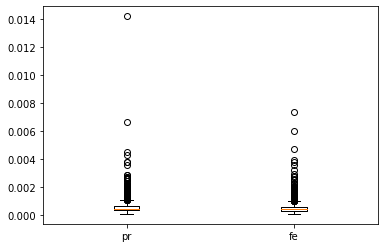

In [7]:
pr=pr_vs_fe['train__pr-q4-9yr__mertic']
fe=pr_vs_fe['test__fe-q4-9yr__mertic']
print('train ',pr.mean(),'  test ',fe.mean())
print('train ',pr.std(),'  test ',fe.std())
plt.boxplot([pr,fe],labels=['pr','fe'])

In [8]:
energy_research(pr_vs_fe,'pr-q4-9yr','fe-q4-9yr',True)

en_min 0.10720283029084297 en_max 6.5554066390007515
train len from 6.31 to 6.56 :  1 ; mean:  0.014210131019353868 ; std :   nan
test len from 6.31 to 6.56 :  0 ; mean:  nan ; std :   nan 


train len from 6.06 to 6.31 :  1 ; mean:  0.0025583782698959108 ; std :   nan
test len from 6.06 to 6.31 :  2 ; mean:  0.0035268659121356905 ; std :   0.0035126554144736324 


train len from 5.81 to 6.06 :  2 ; mean:  0.005548984045162797 ; std :   0.0015349549662691075
test len from 5.81 to 6.06 :  4 ; mean:  0.00259017656208016 ; std :   0.0013695685938405243 


train len from 5.56 to 5.81 :  0 ; mean:  nan ; std :   nan
test len from 5.56 to 5.81 :  2 ; mean:  0.001107401738408953 ; std :   0.00010130019735012461 


train len from 5.31 to 5.56 :  1 ; mean:  0.0020505513530224557 ; std :   nan
test len from 5.31 to 5.56 :  3 ; mean:  0.0019470575886468093 ; std :   0.0011096602397125002 


train len from 5.06 to 5.31 :  5 ; mean:  0.001824229210615158 ; std :   0.0011428424656772422
test len fro

# pr_vs_real__ep39_all.csv

,train__pr-q4-9yr__mertic,train__pr-q4-9yr__ampl,train__pr-q4-9yr__energy,test__sddata_9yr__mertic,test__sddata_9yr__ampl,test__sddata_9yr__energy
0,0.001275,0.811191,18.765699,0.000522,0.031943,0.0
1,0.000175,0.094343,31.094000,0.001139,0.662964,0.0
2,0.000342,0.101500,12.177400,0.000277,0.035020,0.0
3,0.000241,0.132348,16.636000,0.001960,0.539237,0.0
4,0.000534,0.350883,19.641199,0.000483,0.027880,0.0
...,...,...,...,...,...,...
3595,0.000156,0.136390,7.790210,0.000893,0.126356,0.0
3596,0.000380,0.164465,8.092480,0.000349,0.036155,0.0
3597,0.000139,0.075436,9.157730,0.000181,0.047272,0.0
3598,0.000341,0.022961,9.438380,0.002019,0.739073,0.0


train  0.0005347614411847543   test  0.0005014551157809263
train  0.0005216198463154383   test  0.00032725879975724543


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b84906470>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b84906b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b84906160>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5b849122b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b84912630>,
 'means': []}

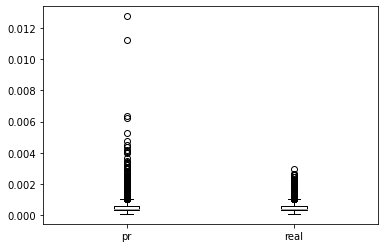

In [9]:
pr_vs_real=pd.read_csv('pr_vs_real__ep39_all.csv')
display(pr_vs_real)
pr=pr_vs_real['train__pr-q4-9yr__mertic']
real=pr_vs_real['test__sddata_9yr__mertic']
print('train ',pr.mean(),'  test ',real.mean())
print('train ',pr.std(),'  test ',real.std())
plt.boxplot([pr,real],labels=['pr','real'])

In [10]:
# разбиение по бинам энергии
pr_vs_real['train_log_energy']=np.log(pr_vs_real['train__pr-q4-9yr__energy'])
pr_vs_real

,train__pr-q4-9yr__mertic,train__pr-q4-9yr__ampl,train__pr-q4-9yr__energy,test__sddata_9yr__mertic,test__sddata_9yr__ampl,test__sddata_9yr__energy,train_log_energy
0,0.001275,0.811191,18.765699,0.000522,0.031943,0.0,2.932031
1,0.000175,0.094343,31.094000,0.001139,0.662964,0.0,3.437015
2,0.000342,0.101500,12.177400,0.000277,0.035020,0.0,2.499582
3,0.000241,0.132348,16.636000,0.001960,0.539237,0.0,2.811569
4,0.000534,0.350883,19.641199,0.000483,0.027880,0.0,2.977629
...,...,...,...,...,...,...,...
3595,0.000156,0.136390,7.790210,0.000893,0.126356,0.0,2.052868
3596,0.000380,0.164465,8.092480,0.000349,0.036155,0.0,2.090935
3597,0.000139,0.075436,9.157730,0.000181,0.047272,0.0,2.214598
3598,0.000341,0.022961,9.438380,0.002019,0.739073,0.0,2.244784


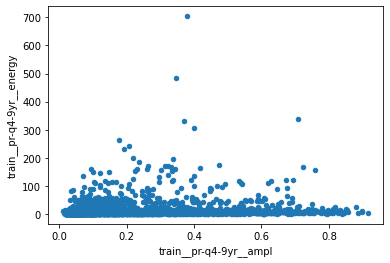

In [11]:
pr_vs_real.plot.scatter('train__pr-q4-9yr__ampl','train__pr-q4-9yr__energy',)

In [12]:
energy_research(pr_vs_real,'pr-q4-9yr')

KeyError: 'train__None__energy'

# ALL (train pr-q4)

,train__pr-q4-9yr__mertic,train__pr-q4-9yr__ampl,train__pr-q4-9yr__energy,test__sddata_9yr__mertic,test__sddata_9yr__ampl,test__sddata_9yr__energy,test__fe-q4-9yr__mertic,test__fe-q4-9yr__ampl,test__fe-q4-9yr__energy,test__pr-q3-9yr__mertic,test__pr-q3-9yr__ampl,test__pr-q3-9yr__energy
0,0.000891,0.811191,18.765699,0.000109,0.043220,0.0,0.000562,0.266740,1.19722,0.000129,0.061230,1.63266
1,0.000242,0.094343,31.094000,0.000218,0.047468,0.0,0.000417,0.487126,1.19849,0.000404,0.295382,2.45998
2,0.000295,0.101500,12.177400,0.000329,0.104576,0.0,0.000125,0.062515,1.93309,0.000089,0.051713,2.17317
3,0.000393,0.132348,16.636000,0.000303,0.244479,0.0,0.000103,0.029866,3.06999,0.000323,0.220604,5.93194
4,0.001008,0.350883,19.641199,0.000820,0.211678,0.0,0.000482,0.029951,2.44973,0.001882,0.767696,4.69166
...,...,...,...,...,...,...,...,...,...,...,...,...
3595,0.000298,0.136390,7.790210,0.001444,0.803679,0.0,0.000585,0.437788,10.56470,0.000150,0.112553,4.96262
3596,0.000420,0.164465,8.092480,0.000704,0.301915,0.0,0.001500,0.536952,7.71651,0.000180,0.095241,3.68835
3597,0.000196,0.075436,9.157730,0.000383,0.047859,0.0,0.000184,0.044869,8.32374,0.000565,0.661530,3.41520
3598,0.000430,0.022961,9.438380,0.000843,0.174908,0.0,0.000333,0.040552,12.12970,0.000276,0.190489,3.59518


['train__pr-q4-9yr__mertic', 'train__pr-q4-9yr__ampl', 'train__pr-q4-9yr__energy', 'test__sddata_9yr__mertic', 'test__sddata_9yr__ampl', 'test__sddata_9yr__energy', 'test__fe-q4-9yr__mertic', 'test__fe-q4-9yr__ampl', 'test__fe-q4-9yr__energy', 'test__pr-q3-9yr__mertic', 'test__pr-q3-9yr__ampl', 'test__pr-q3-9yr__energy']
['train__pr-q4-9yr__mertic', 'test__sddata_9yr__mertic', 'test__fe-q4-9yr__mertic', 'test__pr-q3-9yr__mertic']
train__pr-q4-9yr__mertic mean 0.0004554603323706235 std 0.0005008685436472921
test__sddata_9yr__mertic mean 0.0004336254298313078 std 0.0003790223620126951
test__fe-q4-9yr__mertic mean 0.0004065167263676509 std 0.00036642855949203785
test__pr-q3-9yr__mertic mean 0.0004780329681716466 std 0.0005184825531304704
[array([1.85465811e-04, 3.91974172e-05]), array([0.00055658, 0.0011061 ]), array([1.89504397e-04, 4.32487832e-05]), array([0.00054353, 0.00107382]), array([1.71108495e-04, 2.55083760e-05]), array([0.00050087, 0.00099494]), array([1.90140028e-04, 2.9617493

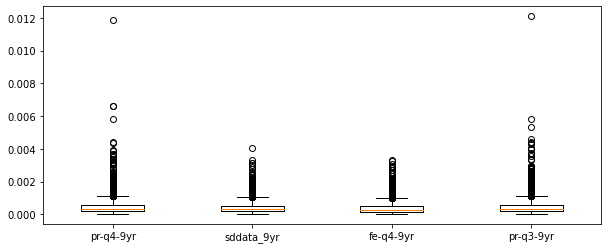

In [13]:
def show_info(csv_file):
    df=pd.read_csv(csv_file)
    display(df)
    names=list(df.columns)
    print(names)
    names_metric=[i for i in names if 'mertic' in i]
    print(names_metric)
    metrics=[]
    for m in names_metric:
        print(m,'mean',df[m].mean(),'std',df[m].std())
        metrics.append(df[m])
    fig, ax = plt.subplots(figsize=(10, 4))
    labels=[i.split('__')[1] for i in names_metric]
    B=ax.boxplot(metrics,labels=labels)
    print([item.get_ydata() for item in B['whiskers']])
show_info('all_9.csv')

,train__pr-q4-9yr__mertic,train__pr-q4-9yr__ampl,train__pr-q4-9yr__energy,test__sddata_9yr__mertic,test__sddata_9yr__ampl,test__sddata_9yr__energy,test__fe-q4-9yr__mertic,test__fe-q4-9yr__ampl,test__fe-q4-9yr__energy,test__pr-q3-9yr__mertic,test__pr-q3-9yr__ampl,test__pr-q3-9yr__energy
0,0.001279,0.811191,18.765699,0.000421,0.043220,0.0,0.000408,0.266740,1.19722,0.000205,0.061230,1.63266
1,0.000392,0.094343,31.094000,0.000251,0.047468,0.0,0.000431,0.487126,1.19849,0.000197,0.295382,2.45998
2,0.000298,0.101500,12.177400,0.000225,0.104576,0.0,0.000356,0.062515,1.93309,0.000266,0.051713,2.17317
3,0.000362,0.132348,16.636000,0.000182,0.244479,0.0,0.000357,0.029866,3.06999,0.000354,0.220604,5.93194
4,0.000811,0.350883,19.641199,0.000808,0.211678,0.0,0.000165,0.029951,2.44973,0.000502,0.767696,4.69166
...,...,...,...,...,...,...,...,...,...,...,...,...
3595,0.000278,0.136390,7.790210,0.001177,0.803679,0.0,0.000451,0.437788,10.56470,0.000419,0.112553,4.96262
3596,0.000428,0.164465,8.092480,0.001385,0.301915,0.0,0.000558,0.536952,7.71651,0.000270,0.095241,3.68835
3597,0.000463,0.075436,9.157730,0.000248,0.047859,0.0,0.000353,0.044869,8.32374,0.000276,0.661530,3.41520
3598,0.000340,0.022961,9.438380,0.000629,0.174908,0.0,0.000482,0.040552,12.12970,0.000365,0.190489,3.59518


['train__pr-q4-9yr__mertic', 'train__pr-q4-9yr__ampl', 'train__pr-q4-9yr__energy', 'test__sddata_9yr__mertic', 'test__sddata_9yr__ampl', 'test__sddata_9yr__energy', 'test__fe-q4-9yr__mertic', 'test__fe-q4-9yr__ampl', 'test__fe-q4-9yr__energy', 'test__pr-q3-9yr__mertic', 'test__pr-q3-9yr__ampl', 'test__pr-q3-9yr__energy']
['train__pr-q4-9yr__mertic', 'test__sddata_9yr__mertic', 'test__fe-q4-9yr__mertic', 'test__pr-q3-9yr__mertic']
train__pr-q4-9yr__mertic mean 0.0005222432495085943 std 0.0004901676401046307
test__sddata_9yr__mertic mean 0.0005163046008682512 std 0.0003662896161418474
test__fe-q4-9yr__mertic mean 0.0004909883881373389 std 0.00035799319821059575
test__pr-q3-9yr__mertic mean 0.0005535202906260868 std 0.00047863468863929324
[array([2.96569997e-04, 8.18180852e-05]), array([0.00059921, 0.00105316]), array([2.98160914e-04, 8.27363328e-05]), array([0.00060186, 0.00105595]), array([2.88527575e-04, 8.00662456e-05]), array([0.00057123, 0.0009951 ]), array([3.10619173e-04, 8.106484

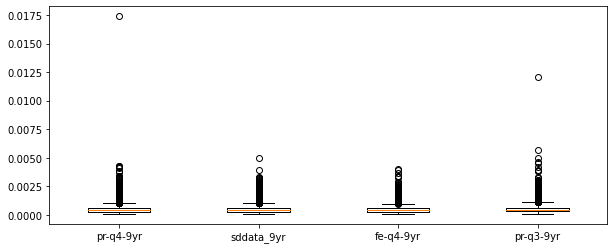

In [14]:
show_info('all_39.csv')

# 'q4_vs_q3.csv'

In [15]:
q4_vs_q3=pd.read_csv('q4_vs_q3.csv')
q4_vs_q3

,train__pr-q4-9yr__mertic,train__pr-q4-9yr__ampl,test__pr-q3-9yr__mertic,test__pr-q3-9yr__ampl
0,0.001686,0.811191,0.000647,0.047572
1,0.000279,0.094343,0.000751,0.262229
2,0.000137,0.101500,0.000551,0.099115
3,0.000526,0.132348,0.000140,0.054351
4,0.000535,0.350883,0.000184,0.167281
...,...,...,...,...
1995,0.000274,0.080194,0.000213,0.162939
1996,0.003597,0.309990,0.000127,0.048980
1997,0.000874,0.392965,0.000238,0.089003
1998,0.000158,0.105047,0.000060,0.036700


In [16]:
q4=q4_vs_q3['train__pr-q4-9yr__mertic']
q3=q4_vs_q3['test__pr-q3-9yr__mertic']

In [17]:
print('train ',q4.mean(),'  test ',q3.mean())
print('train ',q4.std(),'  test ',q3.std())

train  0.00046792945052220603   test  0.0004927415534093598
train  0.0005552637826173069   test  0.0005370926727376955


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b844bbb38>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b844ca278>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b844bb828>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5b844ca978>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b844cacf8>,
 'means': []}

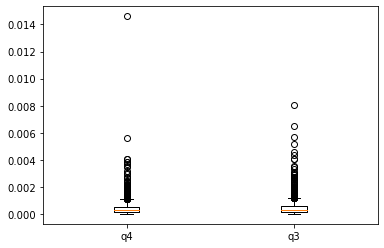

In [18]:
plt.boxplot([q4,q3],labels=['q4','q3'])

# q4_vs_q3__39ep.csv  

train  0.000532768772860436   test  0.0005631539872192661
train  0.0005111684091536063   test  0.0005456692045806127


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b84437908>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b84444048>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b844375f8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5b84444748>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b84444ac8>,
 'means': []}

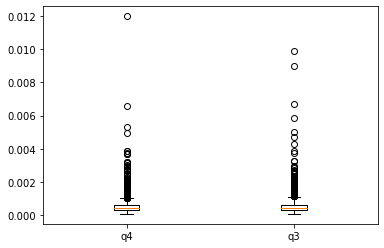

In [19]:
q4_vs_q3=pd.read_csv('q4_vs_q3__39ep.csv')
q4=q4_vs_q3['train__pr-q4-9yr__mertic']
q3=q4_vs_q3['test__pr-q3-9yr__mertic']
print('train ',q4.mean(),'  test ',q3.mean())
print('train ',q4.std(),'  test ',q3.std())
plt.boxplot([q4,q3],labels=['q4','q3'])

# q4_vs_real.csv

In [20]:
q4_vs_real=pd.read_csv('q4_vs_real.csv')
q4_vs_real

,train__pr-q4-9yr__mertic,train__pr-q4-9yr__ampl,test__sddata_9yr__mertic,test__sddata_9yr__ampl
0,0.000798,0.154125,0.000287,0.308884
1,0.001019,0.501525,0.000348,0.074836
2,0.000310,0.044372,0.000411,0.132393
3,0.000433,0.053325,0.000523,0.448933
4,0.000205,0.068688,0.000150,0.153449
...,...,...,...,...
1995,0.000235,0.082039,0.000142,0.077066
1996,0.000448,0.449118,0.000182,0.145817
1997,0.000394,0.069317,0.000371,0.353845
1998,0.000264,0.101337,0.000197,0.077900


In [21]:
q4=q4_vs_real['train__pr-q4-9yr__mertic']
real=q4_vs_real['test__sddata_9yr__mertic']

In [22]:

print('train ',q4.mean(),'  test ',real.mean())
print('train ',q4.std(),'  test ',real.std())

train  0.0004586912596878392   test  0.00043959642746085593
train  0.0004329407735375861   test  0.0003738116149723795


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b843abe10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b843bc550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b843abb00>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5b843bcc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b843bcfd0>,
 'means': []}

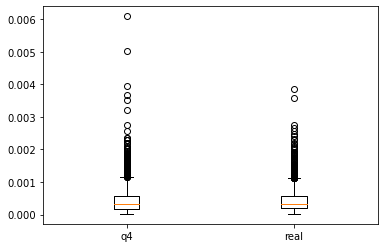

In [23]:
plt.boxplot([q4,real],labels=['q4','real'])

# q4_vs_q3 huge

In [24]:
q4_vs_q3=pd.read_csv('q4_vs_q3.csv')
q4_vs_q3=q4_vs_q3[q4_vs_q3['train__pr-q4-9yr__ampl']>0.2]
q4_vs_q3=q4_vs_q3[q4_vs_q3['test__pr-q3-9yr__ampl']>0.2]
q4_vs_q3

,train__pr-q4-9yr__mertic,train__pr-q4-9yr__ampl,test__pr-q3-9yr__mertic,test__pr-q3-9yr__ampl
11,0.001064,0.283706,0.000500,0.203026
15,0.001484,0.642192,0.000664,0.274321
19,0.002982,0.818386,0.000585,0.242127
40,0.000688,0.305200,0.000581,0.327267
46,0.000275,0.243115,0.000334,0.290322
...,...,...,...,...
1975,0.000789,0.570413,0.000270,0.218193
1981,0.000989,0.618815,0.000308,0.624036
1983,0.000559,0.324375,0.000752,0.293987
1984,0.001168,0.269408,0.000480,0.287222


train  0.0007921799149849119   test  0.0008186417803490842
train  0.0006525511084458581   test  0.0008227263013541978


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b84333438>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b84333b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b84333128>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5b84340278>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b843405f8>,
 'means': []}

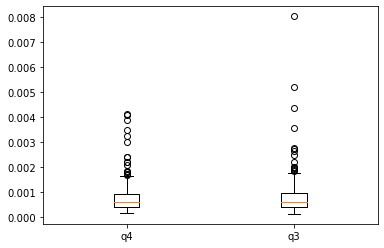

In [25]:
q4=q4_vs_q3['train__pr-q4-9yr__mertic']
q3=q4_vs_q3['test__pr-q3-9yr__mertic']
print('train ',q4.mean(),'  test ',q3.mean())
print('train ',q4.std(),'  test ',q3.std())
plt.boxplot([q4,q3],labels=['q4','q3'])

# q3_q4__vs_real.csv

Index(['train__pr-q4-9yr_pr-q3-9yr__mertic',
       'train__pr-q4-9yr_pr-q3-9yr__ampl', 'test__sddata_9yr__mertic',
       'test__sddata_9yr__ampl'],
      dtype='object')
MEAN: train  0.0006413154702058819   test  0.0005864582567664911
STD: train  0.0005126474287113579   test  0.00042553873578868203


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b842a9fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b842bc710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b842a9cc0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5b842bce10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b842c51d0>,
 'means': []}

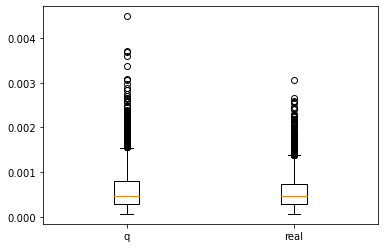

In [26]:
q_vs_real=pd.read_csv('q3_q4__vs_real.csv')
print(q_vs_real.columns)
# q_vs_real=q_vs_real[q_vs_real['train__pr-q4-9yr__ampl']>0.2]
q=q_vs_real['train__pr-q4-9yr_pr-q3-9yr__mertic']
real=q_vs_real['test__sddata_9yr__mertic']
print('MEAN: train ',q.mean(),'  test ',real.mean())
print('STD: train ',q.std(),'  test ',real.std())
plt.boxplot([q,real],labels=['q','real'])

# show anomalys 

In [27]:
q4_vs_real=pd.read_csv('pr_vs_real__ep39_all.csv')
q4_vs_real

,train__pr-q4-9yr__mertic,train__pr-q4-9yr__ampl,train__pr-q4-9yr__energy,test__sddata_9yr__mertic,test__sddata_9yr__ampl,test__sddata_9yr__energy
0,0.001275,0.811191,18.765699,0.000522,0.031943,0.0
1,0.000175,0.094343,31.094000,0.001139,0.662964,0.0
2,0.000342,0.101500,12.177400,0.000277,0.035020,0.0
3,0.000241,0.132348,16.636000,0.001960,0.539237,0.0
4,0.000534,0.350883,19.641199,0.000483,0.027880,0.0
...,...,...,...,...,...,...
3595,0.000156,0.136390,7.790210,0.000893,0.126356,0.0
3596,0.000380,0.164465,8.092480,0.000349,0.036155,0.0
3597,0.000139,0.075436,9.157730,0.000181,0.047272,0.0
3598,0.000341,0.022961,9.438380,0.002019,0.739073,0.0


In [28]:
df=q4_vs_real.sort_values(by=['train__pr-q4-9yr__mertic'])
df

,train__pr-q4-9yr__mertic,train__pr-q4-9yr__ampl,train__pr-q4-9yr__energy,test__sddata_9yr__mertic,test__sddata_9yr__ampl,test__sddata_9yr__energy
2653,0.000074,0.098949,3.467030,0.000321,0.254939,0.0
3577,0.000085,0.212600,5.676760,0.000291,0.229057,0.0
1250,0.000088,0.068138,13.900400,0.000696,0.046345,0.0
1695,0.000096,0.029165,6.956190,0.000601,0.643428,0.0
554,0.000098,0.175620,4.148140,0.000522,0.059695,0.0
...,...,...,...,...,...,...
99,0.005289,0.417028,165.337997,0.000130,0.110422,0.0
802,0.006258,0.338976,196.988007,0.000233,0.362232,0.0
2620,0.006341,0.672273,121.602997,0.000412,0.045699,0.0
101,0.011257,0.347458,485.737000,0.000335,0.083547,0.0


In [29]:
file_name='../../mc_hadrons_qgs34_0010.h5'
with h5py.File(file_name,'r') as f:
    print(f['pr-q4-9yr']['ev_params'][:,2])

[42.4385 40.6731 38.2434 ... 43.0196 37.7934 32.6745]


In [30]:
np.random.seed=42
file_name='../../mc_hadrons_qgs34_0010.h5'
trainable=['pr-q4-9yr']
# not_trainable=['pr-q3-9yr']
not_trainable=['sddata_9yr']
print('trainable',trainable)
print('not_trainable',not_trainable)
n_test=0.8
def train_small(train,weights,threshold=0.2,step=0.05):
    intervals=np.arange(0,threshold+step,step)
    train_small_list=[]
    for train_one in tqdm.tqdm(train):
        for i in range(len(intervals)-1):
            if intervals[i]<train_one.max()<=intervals[i+1]:
                if random.random()<1/weights[i]:
                    train_small_list.append(train_one)
    return train_small_list

def get_data(data_name,num_test=2000):
    train=np.zeros((0,128,2))
    test=np.zeros((0,128,2))
    with h5py.File(file_name,'r') as f:
        print(f.keys())
        print(f['fe-q3-9yr']['ev_params'].shape)
        print(f['fe-q3-9yr']['gp'].shape)
        for name in data_name:
            data=f[name]['wf_max'].value
            data=(data-data.min())/data.max()
            n=int(data.shape[0]*n_test)
            train=np.concatenate([train,data[:n]],axis=0)
            test=np.concatenate([test,data[n:]],axis=0)
            print(test.shape)
    train_huge=train[train.max(axis=1).max(axis=1)>0.2]
#     train_small_list=train_small(train,weights=np.array([1.12229e+05, 1.12466e+05, 5.40300e+04, 3.83330e+04])/ 2.94010e+04,threshold=0.2,step=0.05)   
#     train=np.append(train_small_list,train_huge,axis=0)
#     train=train_huge
#     np.random.shuffle(train)
#     train.shape
    return (train_huge,test[:num_test])
test=get_data(trainable,num_test=3600)[1]

trainable ['pr-q4-9yr']
not_trainable ['sddata_9yr']
<KeysViewHDF5 ['fe-q3-9yr', 'fe-q4-9yr', 'he-q3-9yr', 'he-q4-9yr', 'ni-q3-9yr', 'ni-q4-9yr', 'pr-q3-9yr', 'pr-q4-9yr', 'sddata_9yr']>
(178591, 10)
(178591, 23)


/home/rfit/.conda/envs/robert_venv/lib/python3.6/site-packages/ipykernel_launcher.py:27: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


(53665, 128, 2)


In [31]:
index=list(df.index)
index.reverse()

In [32]:
test_dataset=np.zeros_like(test)
print(test_dataset.shape)
k=0
for i in index:
    test_dataset[k]=test[i]
    k+=1

(3600, 128, 2)


In [33]:
cd ..

/home/rfit/Telescope_Array/max_impuls


In [34]:
import src.metric as metric
import tqdm
import tensorflow as tf

[]


In [35]:
cd Notebooks

/home/rfit/Telescope_Array/max_impuls/Notebooks


In [36]:
# initialisation
generator='../Models/huge_pr-q4-9yr/save_model/generator/ep39'
discriminator='../Models/huge_pr-q4-9yr/save_model/discriminator/ep39'
generator=tf.keras.models.load_model(generator)
discriminator=tf.keras.models.load_model(discriminator)
noise_dim=398
n=64
data=test_dataset[:n]
data_list=metric.func_chunks_generators(data,len(data))
ampl=np.array([])
for image in tqdm.tqdm(data_list):
    image=np.reshape(np.array(image),(-1,128,2))
    image=np.array(image)
    noise_after,noise_befor,Loss,list_R,list_D=metric.find_noise(generator,discriminator,image,noise_dim=noise_dim)
    fake=generator(noise_after)

100%|██████████| 1/1 [03:14<00:00, 194.51s/it]


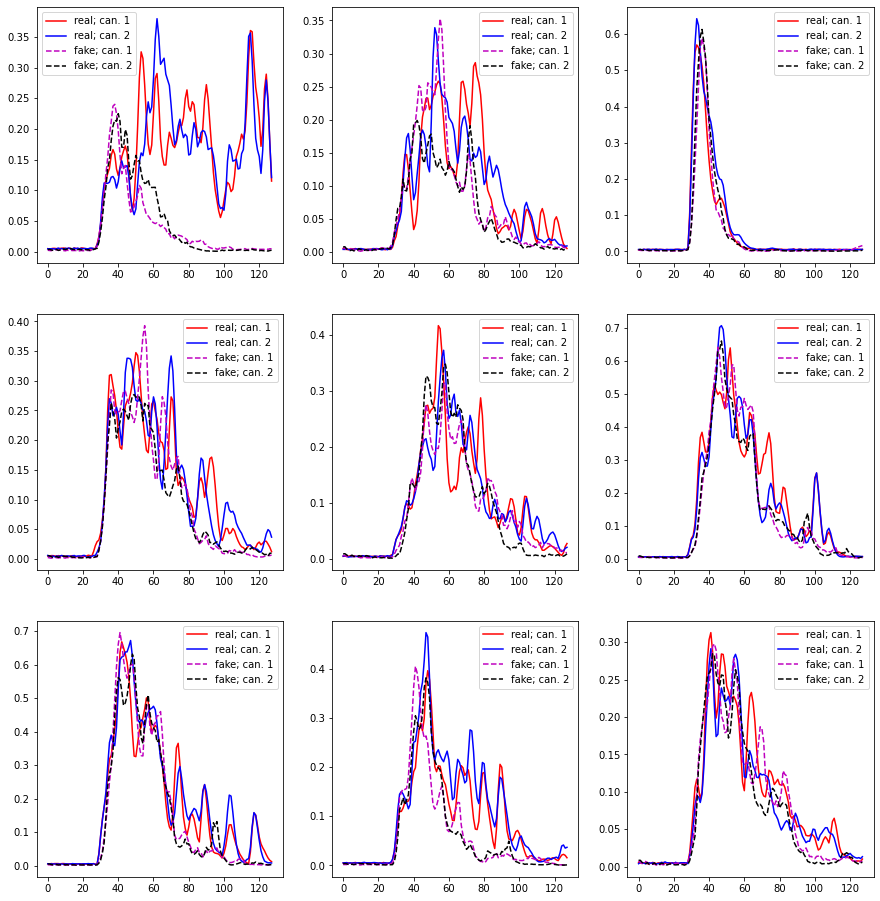

In [37]:
def image(real,fake,columns=1):
    n=real.shape[0]
    fig,axs=plt.subplots(n//columns,columns,figsize=(5*columns,5*n//columns))
    for i in range(n//columns):
        for j in range(columns):
            axs[i,j].plot(real[i+3*j,:,0],'r',label='real; can. 1')
            axs[i,j].plot(real[i+3*j,:,1],'b',label='real; can. 2')
            axs[i,j].plot(fake[i+3*j,:,0],'m--',label='fake; can. 1')
            axs[i,j].plot(fake[i+3*j,:,1],'k--',label='fake; can. 2')
            axs[i,j].legend()
image(data[:10],fake[:10],3)

In [38]:
df

,train__pr-q4-9yr__mertic,train__pr-q4-9yr__ampl,train__pr-q4-9yr__energy,test__sddata_9yr__mertic,test__sddata_9yr__ampl,test__sddata_9yr__energy
2653,0.000074,0.098949,3.467030,0.000321,0.254939,0.0
3577,0.000085,0.212600,5.676760,0.000291,0.229057,0.0
1250,0.000088,0.068138,13.900400,0.000696,0.046345,0.0
1695,0.000096,0.029165,6.956190,0.000601,0.643428,0.0
554,0.000098,0.175620,4.148140,0.000522,0.059695,0.0
...,...,...,...,...,...,...
99,0.005289,0.417028,165.337997,0.000130,0.110422,0.0
802,0.006258,0.338976,196.988007,0.000233,0.362232,0.0
2620,0.006341,0.672273,121.602997,0.000412,0.045699,0.0
101,0.011257,0.347458,485.737000,0.000335,0.083547,0.0


In [39]:
index

[1495,
 101,
 2620,
 802,
 99,
 3377,
 1221,
 1494,
 2629,
 2637,
 100,
 920,
 1989,
 19,
 2634,
 2587,
 1274,
 80,
 2638,
 1483,
 3380,
 1485,
 3374,
 1438,
 3259,
 73,
 2037,
 780,
 3376,
 2020,
 775,
 2586,
 794,
 2615,
 1772,
 2538,
 767,
 2842,
 58,
 1474,
 87,
 90,
 769,
 1488,
 3355,
 782,
 3359,
 1314,
 48,
 1486,
 2641,
 799,
 2009,
 1327,
 2632,
 2002,
 1437,
 800,
 3340,
 2509,
 91,
 2026,
 2606,
 2033,
 3379,
 71,
 694,
 2633,
 1296,
 463,
 798,
 930,
 1309,
 2416,
 1239,
 2031,
 2616,
 3366,
 3341,
 1490,
 247,
 1473,
 1986,
 3378,
 1347,
 969,
 781,
 2914,
 1249,
 2628,
 3254,
 2107,
 1190,
 2605,
 2617,
 784,
 3162,
 2510,
 13,
 1493,
 1035,
 1436,
 65,
 1873,
 3373,
 2014,
 988,
 1996,
 1981,
 2642,
 2607,
 1323,
 1883,
 2552,
 590,
 3318,
 801,
 1502,
 577,
 75,
 735,
 1475,
 3360,
 76,
 770,
 3033,
 1832,
 6,
 1467,
 596,
 3224,
 3357,
 125,
 2636,
 1340,
 3334,
 1169,
 1917,
 1256,
 1351,
 1287,
 3116,
 2818,
 2001,
 2463,
 2623,
 688,
 1427,
 3345,
 803,
 704,
 2017

(53665,)
(3600,)
[11.2407  15.5319   5.42163 ... 30.8701  22.3368  26.822  ]


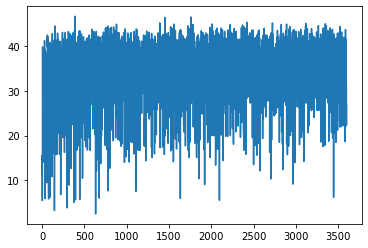

In [59]:
file_name='../../mc_hadrons_qgs34_0010.h5'
with h5py.File(file_name,'r') as f:
    theta=f['pr-q4-9yr']['ev_params'][:,2]
    
    n=int(theta.shape[0]*0.8)
    theta=theta[n:]
    print(theta.shape)
    theta=theta[:3600]
theta_dataset=np.zeros_like(theta)
metrics = np.zeros_like(theta)
print(theta_dataset.shape)
k=0
for i in index:
    theta_dataset[k]=theta[i]
    metrics[k] = float(df.iloc[i]['train__pr-q4-9yr__mertic'])
    k+=1
print(theta_dataset)
plt.plot(theta_dataset[:])

In [57]:
metrics = df['train__pr-q4-9yr__mertic']

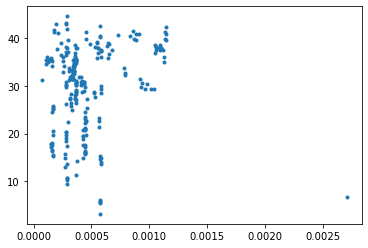

In [61]:
n=250
plt.plot(metrics[:n],theta_dataset[:n],'.')

(array([1., 1., 5., 1., 2., 1., 4., 2., 6., 2.]),
 array([ 5.42163 ,  8.864997, 12.308364, 15.751731, 19.195099, 22.638466,
        26.081833, 29.5252  , 32.968567, 36.411934, 39.8553  ],
       dtype=float32),
 <a list of 10 Patch objects>)

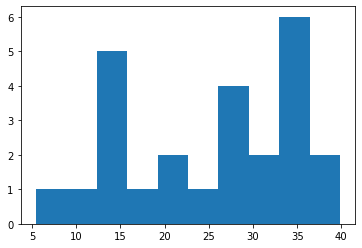

In [42]:
plt.hist(theta_dataset[:25])

Text(0.5, 0, 'Азимутальный угол (от горизонта)')

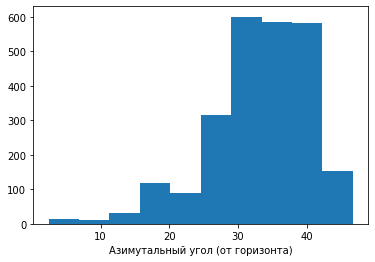

In [62]:
plt.hist(theta_dataset[:2500])
plt.xlabel("Азимутальный угол (от горизонта)")

## 1) сравнить пртоны и железо
## 2) модель на q4 считываем энергии ev_params5), логарифм, разбиваем на бины с шагом 0,25. в каждом бине независимо анализ на аномалии (получаем метрику)
## 3) анализ 1 но с разбитием на энергии 
## 4) наиболее анномальные данные вывести


# отчет по гранту (1,5-2 сраницы)